# Presentación Final

# A01378451 Antonio Turati Morales

## Introducción

### Mi base de datos habla acerca de la frecuencia de cosnumo de alcohol en adolescentes. La base de datos que seleccioné tiene 33 columnas. La base de datos fue descargada de kaggle, y se llama studen-mat.csv

### Me interesa mucho saber acerca de que tipo de información podré obtener del consumo de alcohol en adolescentes, particularmente que variables afectan de manera directa. 

## Columnas Relevantes

### A pesar de que la base de datos tiene 33 columnas diferentes, para simplificar el análisis únicamente voy a trabajar con las siguientes 9 variables:

### 1. Sex. Género del individuo. Tipo binaria. F o M
### 2. age. Edad del individuo. Tipo numérica.15 a 22
### 3. Pstatus. Si sus papás viven juntos o no. Tipo binaria. T (together) o A (apart)
### 4. failures. Cuántas clases ha reprobado. Tipo numérica. 0 a 3
### 5. famrel. Calidad de las relaciones familiares. Tipo numérica. 1 a 5
### 6. goout. Sale con amigos. Tipo numérica. 1 a 5
### 7. absences. Cuantás faltas tiene en la escuela. Tipo numérica. 0 a 93
### 8. Dalc. Consumo de alcohol entre semana. Tipo numérica. 1 a 5
### 9. Walc. Consumo de alcohol en fines de semana. Tipo numérica. 1 a 5


## Hipótesis

### Viendo las variables seleccionadas, podemos esperar una relación entre ciertos datos. Mi hipótesis es que los adolescentes que más consumen alcohol entre semana y los fines de semana van a tener, en su mayoría, las siguientes características:
### Hombres
### Mayores de 18
### Papás separados
### Ha reprobado al menos una clase
### Tiene una calidad baja de relaciones familiares
### Sale frecuentemente con amigos
### Tiene varias faltas en la escuela

### Claro que esto es una hipótesis. Siempre se pueden tener datos diferentes, pero se cree que la mayoría de los datos tendrán las características anteriores


In [8]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [9]:
df = pd.read_csv('datasets/student-mat-final.csv')
df

,sex,age,Pstatus,failures,famrel,goout,absences,Dalc,Walc
0,F,18,A,0,4,4,6,1,1
1,F,17,T,0,5,3,4,1,1
2,F,15,T,3,4,2,10,2,3
3,F,15,T,0,3,2,2,1,1
4,F,16,T,0,4,2,4,1,2
...,...,...,...,...,...,...,...,...,...
390,M,20,A,2,5,4,11,4,5
391,M,17,T,0,2,5,3,3,4
392,M,21,T,3,5,3,3,3,3
393,M,18,T,0,4,1,0,3,4


## Pregunta 1. ¿Qué género consume más alcohol?

In [ ]:
sn.swarmplot (x = 'sex',
              y = 'Dalc',
           data = df)

### Aquí podemos apreciar que las mujeres se encuentran mayoritariamente en el rango de menor consumo. los hombres son la mayoría en el resto de los rangos, particularmente en el 4 y 5. Con esto podemos confirmar que los hombres consumen más alcohol que las mujeres. Esto es entre semana. 

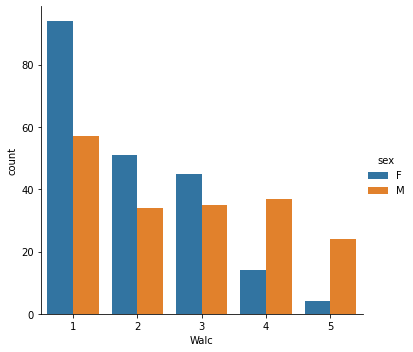

In [11]:
sn.catplot(x = 'Walc',
           data = df,
           kind = 'count',
           hue = 'sex')

### En esta gráfica apreciamos que, en fines de semana, las mujeres consumen más alcohol que los hombres de manera moderada. Esto ya que son la mayoría de los rangos 1 a 3. Sin embargo, vemos que los hombres son los que más abusan de la sustancia ya que se encuentran con una gran mayoría en el consumo 4 y 5. 

## Pregunta 2. ¿Qué edad consume más alcohol?

In [12]:
pivot_P2 = pd.pivot_table(df, index = ['age'], values = ['Dalc'])
pivot_P2 = pivot_P2.sort_values('Dalc', axis = 0, ascending = False)
pivot_P2[:5]

,Dalc
age,
22,5.000000
21,3.000000
20,2.000000
18,1.548780
17,1.520408


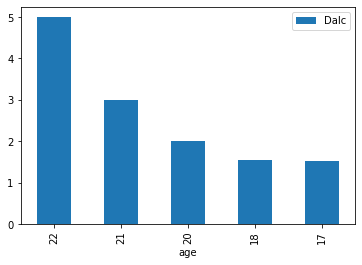

In [13]:
first_5 = pivot_P2[:5]
first_5.plot(kind = 'bar')

### Entre semana, vemos que las edades que más consumen alcohol se distribuyen de esta manera. Curiosamente, la edad de 19 años no se encuentra en el top 5, siendo vencida por 17 y 18 años. 

In [22]:
pivot_P2 = pd.pivot_table(df, index = ['age'], values = ['Walc'])
pivot_P2 = pivot_P2.sort_values('Walc', axis = 0, ascending = False)
pivot_P2[:5]

,Walc
age,
22,5.000000
21,3.000000
17,2.571429
18,2.414634
20,2.333333


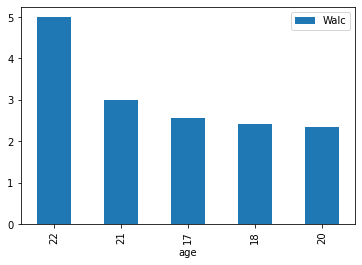

In [23]:
first_5 = pivot_P2[:5]
first_5.plot(kind = 'bar')

### En fines de semana, el patrón cambia un poco. Curiosamente el tercer lugar de consumo de alcohol son los adolescentes de 17 años. Los adolescentes de 22 y 21 años mantienen su posición como primer y segundo lugar

## Pregunta 3. ¿Que relación hay entre materias reprobadas y consumo de alcohol?

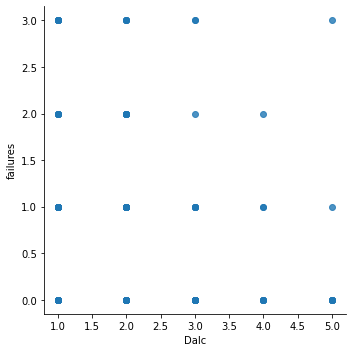

In [15]:
sn.lmplot (x = 'Dalc',
           y = 'failures',
           data = df,
           fit_reg = False)

### No se ve una correlación aparente entre materias reprobadas y consumo de alcohol. Esto significa que, a pesar de que repruebes o no materias, el consumo de alcohol no se ve afectado. 

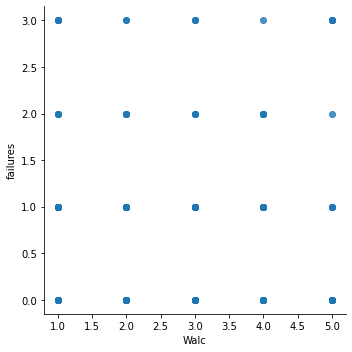

In [16]:
sn.lmplot (x = 'Walc',
           y = 'failures',
           data = df,
           fit_reg = False)

### Lo mismo sucede con el consumo de alcohol en fines de semana

## Pregunta 4. ¿Existe algún estatus de papás en donde hay más consumo de alcohol?

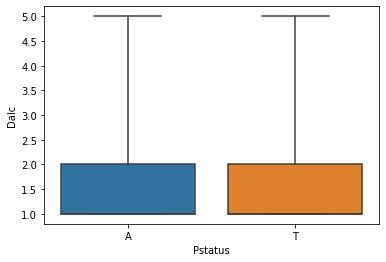

In [17]:
sn.boxplot( x = df['Pstatus'], y = df['Dalc'], whis = (0,100))

### El consumo de alcohol entre semana, tampoco se ve afectado si tus papás están juntos o separados. Aunque la hipótesis sugería que los chavos con papás separados iban a tener un mayor consumo de alcohol, los datos nos muestran que es irrelevante si sus papás están juntos o separados, para el consumo de alcohol entre semana

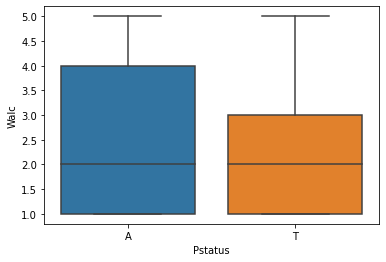

In [18]:
sn.boxplot( x = df['Pstatus'], y = df['Walc'], whis = (0,100))

### Sin embargo, esto si se ve afectado en el consumo de alcohol entre semana. Aunque la media sigue siendo similar, la boxplot se extiende mucho más cuando los papás están separados. Esto puede implicar un abuso de sustancias cuando los papás están separados

## Pregunta 5: ¿Existe mayor consumo de alcohol cuando se tiene peor relación con los papás?

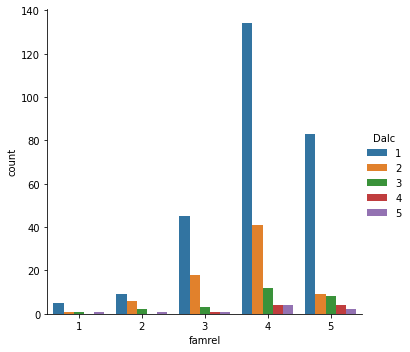

In [19]:
sn.catplot(x= 'famrel',
           data = df,
           kind = 'count',
           hue = 'Dalc')

### Aquí podemos ver que a mejor relación familiar, el consumo de alcohol es reducido o moderado. No se ve un abuso de sustancias evidente cuando las relaciones familiares son bajas

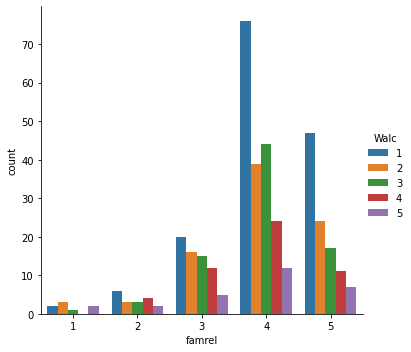

In [20]:
sn.catplot(x= 'famrel',
           data = df,
           kind = 'count',
           hue = 'Walc')

### Lo mismo sucede en fines de semana. No existe una tendencia de abuso de sustancias cuando las relaciones familiares son bajas. Sin embargo, si vemos una tendencia de cuando las relaciones familiares son de buena calidad (4 y 5), el consumo de alcohol suele ser moderado en cantidades. 

## Pregunta 6. ¿Hay alguna relación entre la cantidad de faltas y el número de fallas?

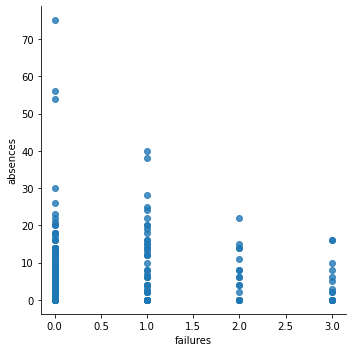

In [21]:
sn.lmplot (x = 'failures',
           y = 'absences',
           data = df,
           fit_reg = False)

### Curiosamente, existe una relación inversa. Entre más faltas llega a tener una persona, es más probable que NO haya reprobado ninguna materia. Esto genera ruido ya que intuitivamente, uno pensaría que a mayor faltas se tendrían más materias reprobadas. Esto puede suceder ya que, cuando sabes que la materia la puedes reprobar, empiezas a asistir a clase para ver si la materia puede ser salvada. Por el contrario cuando sabes que ya pasaste, empiezas a relajarte y faltar a clases en la materia